In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
class Data:
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)

    def filter_by_date(self, start_date, end_date):
        """
        Filters data by the given date range.
        """
        self.data['dt_date'] = pd.to_datetime(self.data['dt_date'])
        self.data = self.data[(self.data['dt_date'] >= start_date) & 
                              (self.data['dt_date'] <= end_date)]

    def get_data(self):
        return self.data

class TrafficData(Data):
    def __init__(self, file_path):
        super().__init__(file_path)

# Subclass for NO2 Data
class NO2Data(Data):
    def __init__(self, file_path):
        super().__init__(file_path)

In [5]:
def calculate_summary_stats(data, group_column, value_column):
    """
    Calculate the mean and standard deviation for each group (e.g., 2022 and 2023).
    """
    summary_stats = data.groupby(group_column)[value_column].agg(['mean', 'std', 'count']).reset_index()
    return summary_stats

# Function to perform a t-test (or Mann-Whitney U test if necessary)
def compare_means(data, group_column, value_column):
    """
    Perform both a t-test and a Mann-Whitney U test to compare means between two groups.
    """
    # Extract data for each group (2022 and 2023)
    group_2022 = data[data[group_column] == 2022][value_column]
    group_2023 = data[data[group_column] == 2023][value_column]

    # Perform t-test assuming normal distribution
    t_stat, t_p_value = stats.ttest_ind(group_2022, group_2023, equal_var=False)

    # Perform Mann-Whitney U test (for non-parametric comparison)
    u_stat, u_p_value = stats.mannwhitneyu(group_2022, group_2023)

    # Return both test results as a dictionary
    return {
        't-test': {'t-statistic': t_stat, 'p-value': t_p_value},
        'u-test': {'u-statistic': u_stat, 'p-value': u_p_value}
    }


# Function to create boxplots with summary statistics
def create_boxplot_with_stats(data, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[x_column], y=data[y_column])
    plt.title(title)
    plt.xticks(rotation=45)

    # Add mean values to the plot
    means = data.groupby(x_column)[y_column].mean().reset_index()
    for i, mean_value in enumerate(means[y_column]):
        plt.text(i, mean_value, f'{mean_value:.2f}', color='black', ha="center")

    plt.tight_layout()
    plt.show()

In [6]:
traffic = TrafficData("traffic.csv")
traffic.filter_by_date("2022-08-01", "2023-09-30")
filtered_traffic = traffic.get_data()

In [ ]:
filtered_traffic

In [8]:
no2 = NO2Data("no2.csv")
no2.filter_by_date("2022-08-01", "2023-09-30")
filtered_no2 = no2.get_data()

In [ ]:
filtered_no2

In [ ]:
traffic_stats = calculate_summary_stats(filtered_traffic, 'dt_year', 'total_flow')
print("Traffic Flow Summary Statistics:")
print(traffic_stats)

In [ ]:
traffic_test_results = compare_means(filtered_traffic, 'dt_year', 'total_flow')
print("Traffic Flow Comparison Results:")
print("T-test: t-stat = {t-statistic:.3f}, p-value = {p-value:.3f}".format(**traffic_test_results['t-test']))
print("U-test: u-stat = {u-statistic:.3f}, p-value = {p-value:.3f}".format(**traffic_test_results['u-test']))

In [ ]:
print("Filtered NO2 Data for 2022:")
print(filtered_no2[filtered_no2['dt_year'] == 2022].head())
print("Filtered NO2 Data for 2023:")
print(filtered_no2[filtered_no2['dt_year'] == 2023].head())

print("Summary statistics for NO2 data by year:")
print(filtered_no2.groupby('dt_year')['no2_daily'].describe())


In [58]:
filtered_no2 = filtered_no2.dropna(subset=['no2_daily'])


In [59]:
def compare_means(data, group_column, value_column):
    """
    Perform both a t-test and a Mann-Whitney U test to compare means between two groups.
    """
    # Extract data for each group (2022 and 2023)
    group_2022 = data[data[group_column] == 2022][value_column]
    group_2023 = data[data[group_column] == 2023][value_column]

    # Check if the groups are empty or have no variance
    if group_2022.empty or group_2023.empty:
        return {
            't-test': {'t-statistic': float('nan'), 'p-value': float('nan')},
            'u-test': {'u-statistic': float('nan'), 'p-value': float('nan')}
        }

    if group_2022.var() == 0 or group_2023.var() == 0:
        print(f"Warning: One of the groups has no variance. Skipping t-test and U-test.")
        return {
            't-test': {'t-statistic': float('nan'), 'p-value': float('nan')},
            'u-test': {'u-statistic': float('nan'), 'p-value': float('nan')}
        }

    # Perform t-test assuming normal distribution
    t_stat, t_p_value = stats.ttest_ind(group_2022, group_2023, equal_var=False)

    # Perform Mann-Whitney U test (for non-parametric comparison)
    u_stat, u_p_value = stats.mannwhitneyu(group_2022, group_2023)

    # Return both test results as a dictionary
    return {
        't-test': {'t-statistic': t_stat, 'p-value': t_p_value},
        'u-test': {'u-statistic': u_stat, 'p-value': u_p_value}
    }


In [ ]:
# Perform t-test and u-test for NO2 Data
no2_test_results = compare_means(filtered_no2, 'dt_year', 'no2_daily')
print("\nNO2 Levels Comparison Results:")
print("T-test: t-stat = {t-statistic:.3f}, p-value = {p-value:.3f}".format(**no2_test_results['t-test']))
print("U-test: u-stat = {u-statistic:.3f}, p-value = {p-value:.3f}".format(**no2_test_results['u-test']))


In [ ]:
sns.boxplot(x='dt_year', y='no2_daily', data=filtered_no2)
plt.title('Boxplot of NO2 Levels by Year')
plt.show()


Traffic Flow Comparison Results:
Test used: u-test
Statistic: 32294.500, P-value: 0.105

NO2 Levels Comparison Results:
Test used: u-test
Statistic: 54731.000, P-value: 0.000


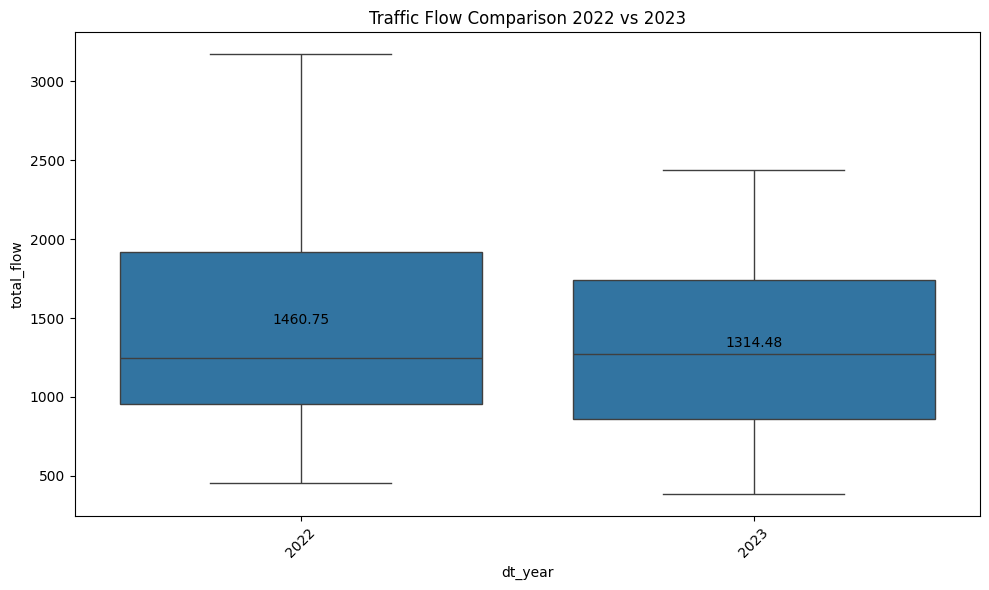

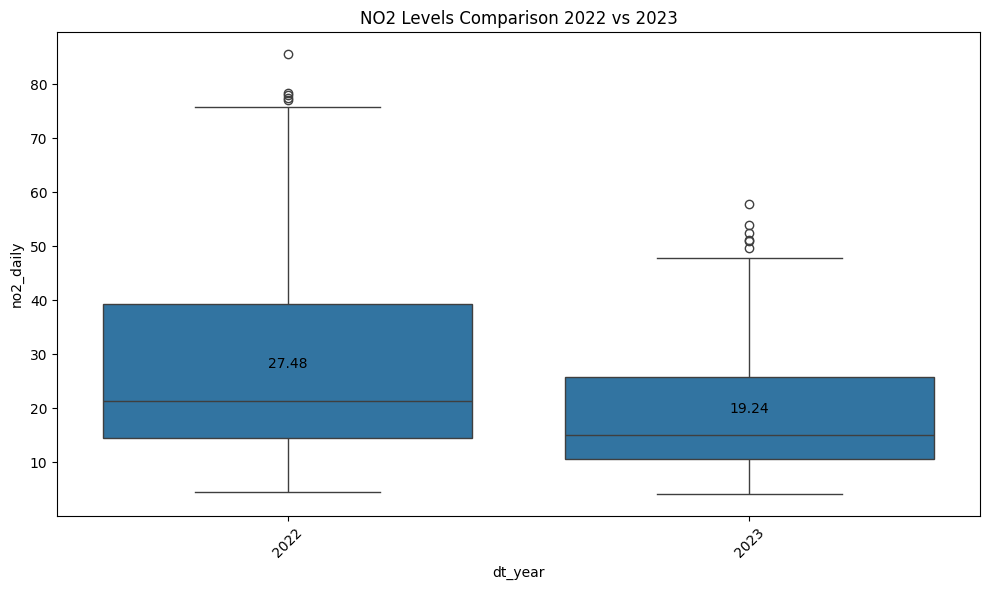

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Base Class for Shared Functionality
class Data:
    """
    Encapsulation: 
    The Data class encapsulates the loading, filtering, and getting of data. 
    It hides the internal details of how data is loaded and processed.
    
    Inheritance: 
    This is a base class that provides shared methods for subclasses like TrafficData and NO2Data.
    """
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)

    def filter_by_date(self, start_date, end_date):
        """
        Abstraction:
        This method provides a simple interface for filtering data by date, 
        without exposing the underlying implementation details.
        """
        self.data['dt_date'] = pd.to_datetime(self.data['dt_date'])
        self.data = self.data[(self.data['dt_date'] >= start_date) & 
                              (self.data['dt_date'] <= end_date)]

    def get_data(self):
        return self.data

# Subclass for Traffic Data
class TrafficData(Data):
    """
    Inheritance:
    This class inherits from the Data class and uses its methods. 
    It can be extended with traffic-specific methods if necessary.
    """
    def __init__(self, file_path):
        super().__init__(file_path)  # Inheritance from the base class Data

# Subclass for NO2 Data
class NO2Data(Data):
    """
    Inheritance:
    This class inherits from Data and could be extended with NO2-specific 
    functionality like normalization or statistical analysis.

    Polymorphism (potential):
    You could override or add specific statistical methods here to create polymorphic behavior.
    """
    def __init__(self, file_path):
        super().__init__(file_path)  # Inheritance from the base class Data

# Function to calculate summary statistics (mean and std)
def calculate_summary_stats(data, group_column, value_column):
    """
    Abstraction:
    This function abstracts away the complex logic of calculating summary statistics 
    and provides a simple interface for getting mean and standard deviation.
    """
    summary_stats = data.groupby(group_column)[value_column].agg(['mean', 'std', 'count']).reset_index()
    return summary_stats

def check_normality(group):
    """
    Checks if the data follows a normal distribution using the Shapiro-Wilk test.
    Returns True if the data is normally distributed, False otherwise.
    """
    stat, p_value = stats.shapiro(group)
    return p_value > 0.05  # If p-value > 0.05, assume normal distribution

def compare_means(data, group_column, value_column):
    """
    Perform both a t-test and a Mann-Whitney U test to compare means between two groups.
    Chooses the appropriate test based on the normality of the data.
    """
    # Extract data for each group (2022 and 2023)
    group_2022 = data[data[group_column] == 2022][value_column]
    group_2023 = data[data[group_column] == 2023][value_column]

    # Check if the groups are empty or have no variance
    if group_2022.empty or group_2023.empty:
        return {
            'test': 'None',
            'result': {'statistic': float('nan'), 'p-value': float('nan')}
        }

    if group_2022.var() == 0 or group_2023.var() == 0:
        print(f"Warning: One of the groups has no variance. Skipping tests.")
        return {
            'test': 'None',
            'result': {'statistic': float('nan'), 'p-value': float('nan')}
        }

    # Check if both groups are normally distributed
    normal_2022 = check_normality(group_2022)
    normal_2023 = check_normality(group_2023)

    if normal_2022 and normal_2023:
        # Perform t-test assuming normal distribution
        t_stat, t_p_value = stats.ttest_ind(group_2022, group_2023, equal_var=False)
        return {
            'test': 't-test',
            'result': {'statistic': t_stat, 'p-value': t_p_value}
        }
    else:
        # Perform Mann-Whitney U test (non-parametric)
        u_stat, u_p_value = stats.mannwhitneyu(group_2022, group_2023)
        return {
            'test': 'u-test',
            'result': {'statistic': u_stat, 'p-value': u_p_value}
        }


# Function to create boxplots with summary statistics
def create_boxplot_with_stats(data, x_column, y_column, title):
    """
    Abstraction:
    This function abstracts the logic for plotting the boxplots with statistics, 
    hiding the complexity from the user.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[x_column], y=data[y_column])
    plt.title(title)
    plt.xticks(rotation=45)

    # Add mean values to the plot
    means = data.groupby(x_column)[y_column].mean().reset_index()
    for i, mean_value in enumerate(means[y_column]):
        plt.text(i, mean_value, f'{mean_value:.2f}', color='black', ha="center")

    plt.tight_layout()
    plt.show()

# Sample Usage in the main function
if __name__ == "__main__":
    # Load Traffic Data
    traffic = TrafficData("traffic.csv")
    traffic.filter_by_date("2022-08-01", "2023-09-30")
    filtered_traffic = traffic.get_data()

    # Load NO2 Data
    no2 = NO2Data("no2.csv")
    no2.filter_by_date("2022-08-01", "2023-09-30")
    filtered_no2 = filtered_no2.dropna(subset=['no2_daily'])


    # Perform test for Traffic Data (automatic choice of t-test or u-test)
    traffic_test_results = compare_means(filtered_traffic, 'dt_year', 'total_flow')
    print("Traffic Flow Comparison Results:")
    print(f"Test used: {traffic_test_results['test']}")
    print(f"Statistic: {traffic_test_results['result']['statistic']:.3f}, P-value: {traffic_test_results['result']['p-value']:.3f}")

    # Perform test for NO2 Data (automatic choice of t-test or u-test)
    no2_test_results = compare_means(filtered_no2, 'dt_year', 'no2_daily')
    print("\nNO2 Levels Comparison Results:")
    print(f"Test used: {no2_test_results['test']}")
    print(f"Statistic: {no2_test_results['result']['statistic']:.3f}, P-value: {no2_test_results['result']['p-value']:.3f}")

    # Generate Boxplot for Traffic Data with Mean Values
    create_boxplot_with_stats(filtered_traffic, 'dt_year', 'total_flow', 'Traffic Flow Comparison 2022 vs 2023')

    # Generate Boxplot for NO2 Data with Mean Values
    create_boxplot_with_stats(filtered_no2, 'dt_year', 'no2_daily', 'NO2 Levels Comparison 2022 vs 2023')

